In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

model.compile(optimizer='sgd', loss = 'mean_squared_error')

xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype = float)
ys = np.array([-2.0, 1.0, 4.0, 7.0, 10.0, 13.0], dtype = float)

model.fit(xs, ys, epochs = 500)

print(model.predict([10.0]))

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('acc')>0.95):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()            

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

training_images = training_images/ 255.0
test_images = test_images/ 255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation=tf.nn.relu), #dense : add a layer of neurons
                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(training_images, training_labels, epochs = 5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)
print(classifications[0])



In [ ]:
import cv2
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

i = misc.ascent()

plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

filter = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
weight = 1

for x in range(1,size_x-1):
    for y in range(1,size_y-1):
        output_pixel = 0.0
        output_pixel = output_pixel+(i[x-1, y-1]*filter[0][0])
        output_pixel = output_pixel+(i[x, y-1]*filter[0][1])
        output_pixel = output_pixel+(i[x+1,y-1]*filter[0][2])
        output_pixel = output_pixel+(i[x-1,y]*filter[1][0])
        output_pixel = output_pixel+(i[x, y]* filter[1][1])
        output_pixel = output_pixel+(i[x+1, y]*filter[1][2])
        output_pixel = output_pixel+(i[x-1, y+1]*filter[2][0])
        output_pixel = output_pixel+(i[x, y+1]*filter[2][1])
        output_pixel = output_pixel+(i[x+1, y+1]* filter[2][2])
        output_pixel = output_pixel * weight
        if(output_pixel<0):
            output_pixel = 0
        if(output_pixel>255):
            output_pixel = 255
        i_transformed[x,y] = output_pixel
        
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)

plt.show()

new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))

for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        pixels = []
        pixels.append(i_transformed[x,y])
        pixels.append(i_transformed[x+1,y])
        pixels.append(i_transformed[x,y+1])
        pixels.append(i_transformed[x+1,y+1])
        pixels.sort(reverse = True)
        newImage[int(x/2), int(y/2)] = pixels[0]
        
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images/255.0
test_images = test_images/255.0
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])
model.compile(optimzer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(training_images, training_labels, epochs = 5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs = 5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

print(test_labels[:100])

f, axarr = plt.subplots(3, 4)
FIRST_IMAGE = 0
SECOND_IMAGE = 23
THIRD_IMAGE = 28
CONVOLUTION_NUMBER = 6

from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0,:,:,CONVOLUTION_NUMBER], cmap = 'inferno')
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0,:,:,CONVOLUTION_NUMBER], cmap = 'inferno')
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0,:,:,CONVOLUTION_NUMBER], cmap = 'inferno')
    axarr[2,x].grid(True)

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']
total training horse images:  500
total training human images:  527


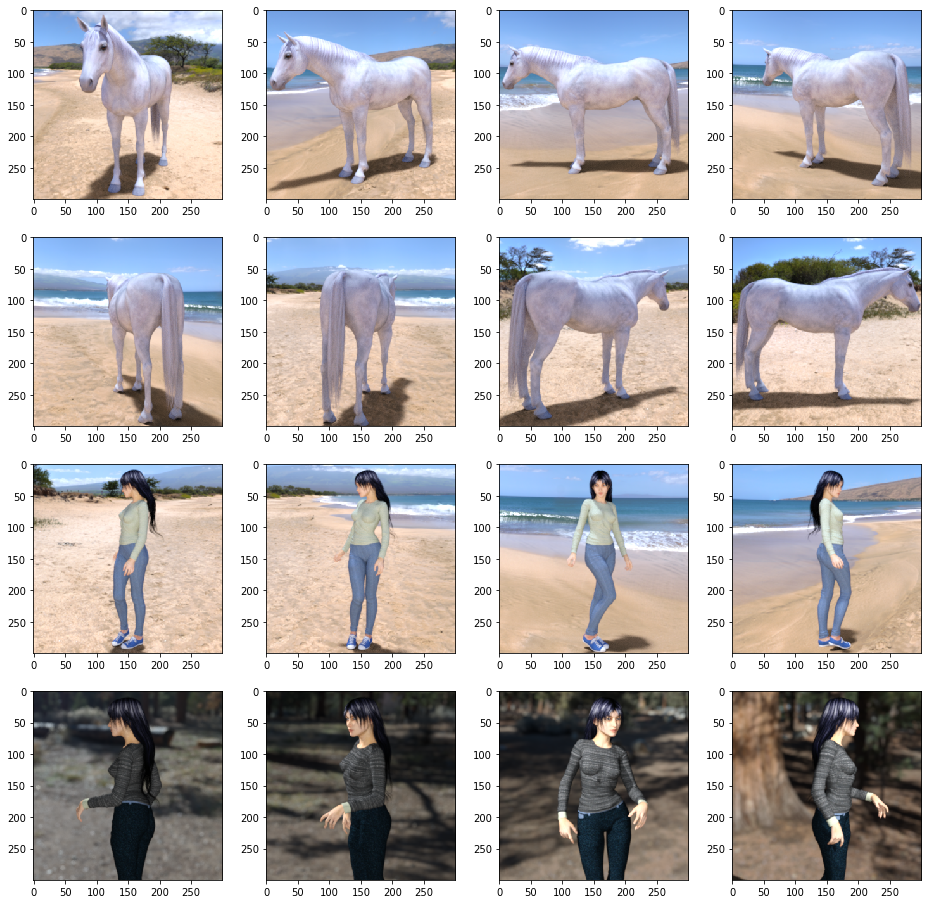

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 33, 33, 64)       

C:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in true_divide


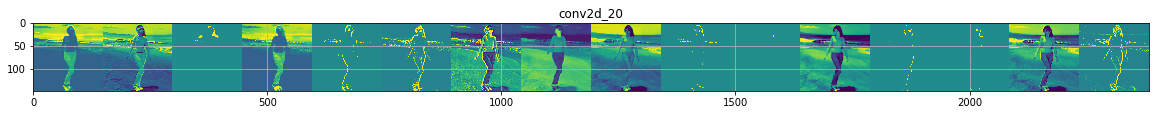

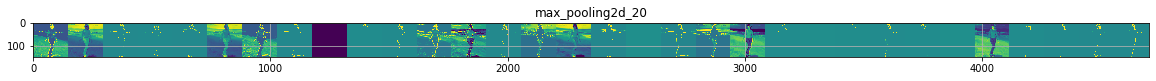

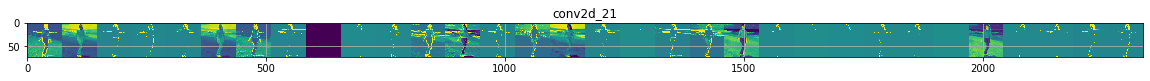

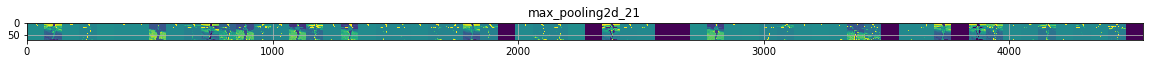

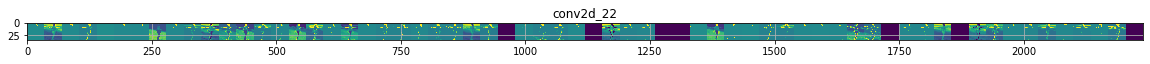

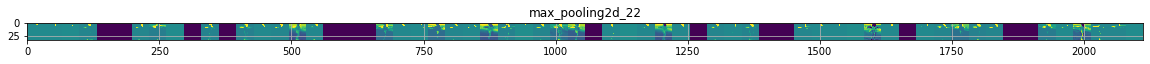

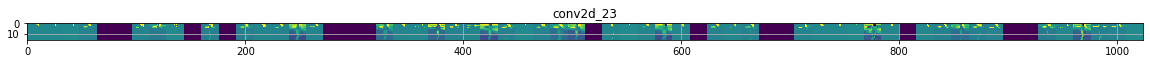

In [6]:
import os
import zipfile

#file source
#https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

train_horse_dir = os.path.join('./horse-or-human/horses')

train_human_dir = os.path.join('./horse-or-human/humans')

train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

print('total training horse images: ', len(os.listdir(train_horse_dir)))
print('total training human images: ', len(os.listdir(train_human_dir)))

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows*4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                 for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                 for fname in train_human_names[pic_index-8::pic_index]]

for i, img_path in enumerate(next_horse_pix + next_human_pix):
    
    if i+1 > nrows * ncols:
        break
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('On')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    #512 neuron hidden layer
    tf.keras.layers.Dense(512, activation = 'relu'),
    #Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horse or human')
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.summary()

from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(lr = 0.001),
             metircs = ['acc'])

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1. / 255)

#Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
'./horse-or-human/',
target_size = (300, 300),
batch_size = 64,
class_mode = 'binary')

history = model.fit_generator(
train_generator,
steps_per_epoch = 8,
epochs = 15,
verbose = 1) # out of memory, #batch size was too big. 128 -> 64

import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size = (300, 300))
x = img_to_array(img) #numpy array with shape(150, 150, 3)
x = x.reshape((1,) + x.shape)

x /= 255

successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        #just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]
        #the feautre map has shape(1, size, size, n_features)
        size = feature_map.shape[1]
        #we will tile our images in this matrix
        display_grid = np.zeros((size, size*n_features))
        
        for i in range(n_features):
            #Postprocess the feature to make it visually palatable
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            #we'll tile each filter into this big horizontal grid
            display_grid[:, i*size : (i+1)*size] = x
        #display the grid
        
        scale = 20. / n_features
        plt.figure(figsize = (scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(True)
        plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')

